# Part I - Ford GoBike System Data
## by ADENIYI

## Introduction
> This  dataset is about a the Ford bike system on the transaction of daily rentage of bike by their member


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
bike = pd.read_csv("201902-fordgobike-tripdata.csv")
print(bike.shape)
print(bike.info())
bike.head()

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> This dataset has 183412 transaction records with 16 variables namely:	duration_sec, start_time, end_time	start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name	end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out the average time weekday and in respect with hours of the day

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The member_birth year will be useful knowing the age that used most and also, gender, user_type, start_time, end_time will be useful knowning the periods and hours of the day that member used the bike most

# WRANGLING

## Testing for dirty and tidy issues

In [3]:
bike_clean = bike.copy()

In [4]:
bike_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
116742,1177,2019-02-12 07:09:25.5470,2019-02-12 07:29:02.7450,58.0,Market St at 10th St,37.776619,-122.417385,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,4644,Customer,1989.0,Male,No
73734,533,2019-02-19 12:45:28.6280,2019-02-19 12:54:22.2580,375.0,Grove St at Masonic Ave,37.774836,-122.446546,73.0,Pierce St at Haight St,37.771793,-122.433708,4557,Subscriber,NaN,NaN,No
29887,1001,2019-02-25 05:31:00.7590,2019-02-25 05:47:41.8440,126.0,Esprit Park,37.761634,-122.390648,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1917,Subscriber,1952.0,Male,No
164015,679,2019-02-05 08:44:21.3680,2019-02-05 08:55:41.2200,22.0,Howard St at Beale St,37.789756,-122.394643,80.0,Townsend St at 5th St,37.775235,-122.397437,5337,Subscriber,1985.0,Male,No
75750,959,2019-02-19 08:42:34.0540,2019-02-19 08:58:33.8120,85.0,Church St at Duboce Ave,37.770083,-122.429156,81.0,Berry St at 4th St,37.775880,-122.393170,2047,Subscriber,1993.0,Female,No
131229,894,2019-02-09 13:32:28.4230,2019-02-09 13:47:23.2110,175.0,49th St at Telegraph Ave,37.835946,-122.262366,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,414,Subscriber,1993.0,Female,No
106312,908,2019-02-13 18:17:29.9620,2019-02-13 18:32:38.7080,81.0,Berry St at 4th St,37.775880,-122.393170,98.0,Valencia St at 16th St,37.765052,-122.421866,4968,Subscriber,1986.0,Male,No
86550,262,2019-02-17 12:36:26.2400,2019-02-17 12:40:48.5820,254.0,Vine St at Shattuck Ave,37.880222,-122.269592,258.0,University Ave at Oxford St,37.872355,-122.266447,6405,Subscriber,1989.0,Male,No
175325,618,2019-02-02 14:40:45.1810,2019-02-02 14:51:03.7710,166.0,College Ave at Alcatraz Ave,37.851376,-122.252523,211.0,Broadway at 40th St,37.827757,-122.256716,4900,Subscriber,1977.0,Female,Yes
126026,2405,2019-02-10 21:11:02.4020,2019-02-10 21:51:08.0060,109.0,17th St at Valencia St,37.763316,-122.421904,386.0,24th St at Bartlett St,37.752105,-122.419724,5246,Subscriber,1992.0,Male,No


In [5]:
bike_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


The duration_sec columns seem to have a very high ouliers with 75% around less than 800sec and maximum value over 85k sec

In [6]:
count = ["start_station_name","end_station_name", "user_type", "member_gender","bike_share_for_all_trip"]
for col in count:
    print(col, bike_clean[col].nunique())
        
count

start_station_name 329
end_station_name 329
user_type 2
member_gender 3
bike_share_for_all_trip 2


['start_station_name',
 'end_station_name',
 'user_type',
 'member_gender',
 'bike_share_for_all_trip']

In [7]:
bike_clean["member_gender"].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [8]:
bike_clean[bike_clean.member_gender.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [9]:
bike_clean[bike_clean.start_station_id.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


## Dirty & Tidy Issues

1. Zero after start_station_id, end_station_id and meneber_birth_year columns
2. start_time and end_time not in datetime datatype
3. Missing value for member_gender, member_birth_year, and station details columns
4. Unnecesary columns for our analysis eg start_station_latitude,start_staion_longitude,  end_station_latitude, end_station_longititude

## Issue #1

#### Define
Remove ending zeros from start_station_id, end_station_id and meneber_birth_year columns

### Code

In [10]:
zero_end_col =["member_birth_year","start_station_id", "end_station_id"]

In [11]:
for col in zero_end_col:
    bike_clean[col]=bike_clean[col].astype(str).str.extract(r"([0-9]+)\.0")

### Test

In [12]:
bike_clean[zero_end_col].head(10)

,member_birth_year,start_station_id,end_station_id
0,1984,21,13
1,NaN,23,81
2,1972,86,3
3,1989,375,70
4,1974,7,222
5,1959,93,323
6,1983,300,312
7,1989,10,127
8,1988,10,127
9,1992,19,121


##  Issue #2

### Define
Covert start_time and end_time to datetime object data type

### Code

In [13]:
bike_clean["start_time"]= pd.to_datetime(bike_clean["start_time"]).astype(str).str.extract("(.+)\.\w+")
bike_clean["end_time"]= pd.to_datetime(bike_clean["end_time"]).astype(str).str.extract("(.+)\.\w+")

In [14]:
bike_clean["start_time"]= pd.to_datetime(bike_clean["start_time"])
bike_clean["end_time"]= pd.to_datetime(bike_clean["end_time"])

### Test


In [15]:
print(bike_clean[["start_time", "end_time"]].dtypes)
bike_clean[["start_time", "end_time"]]

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object


,start_time,end_time
0,2019-02-28 17:32:10,2019-03-01 08:01:55
1,2019-02-28 18:53:21,2019-03-01 06:42:03
2,2019-02-28 12:13:13,2019-03-01 05:24:08
3,2019-02-28 17:54:26,2019-03-01 04:02:36
4,2019-02-28 23:54:18,2019-03-01 00:20:44
...,...,...
183407,2019-02-01 00:04:49,2019-02-01 00:12:50
183408,2019-02-01 00:05:34,2019-02-01 00:10:48
183409,2019-02-01 00:06:05,2019-02-01 00:08:27
183410,2019-02-01 00:05:34,2019-02-01 00:07:54


## Issue #3

### Define
Fix columns with null values

### Code

In [16]:
bike_clean.dropna(inplace=True)

### Test

In [17]:
len(bike_clean.isna())== bike_clean.shape[0]

True

# Feature engineering

Since we are going to working with age, month name and hours let extract this columns from our dataset

## First extracting

From start_date and end_date columns let extract the month and day name from both columns

In [18]:
bike_clean.start_time.dt.strftime("%b").unique()

array(['Feb'], dtype=object)

With the above code, this shows that this dataset is generated for only the month of february 2019, Hence all our analysis with be based on this month data. Let continue to exctract the hour of the day that the transaction take place

In [19]:
bike_clean["start_hour"]=bike_clean.start_time.dt.hour
bike_clean["end_hour"]=bike_clean.end_time.dt.hour

Finally let extract day name

In [20]:
bike_clean["start_weekday"]=bike_clean.start_time.dt.day_name().apply(lambda x: x[:3])
bike_clean["end_weekday"]=bike_clean.end_time.dt.day_name().apply(lambda x: x[:3])

## Second extraction

Also, since we want no analyse this dataset based on hour, let set duration on activity to hours by dividing the duration_sec by 60

In [21]:
bike_clean["duration_min"]= bike_clean.duration_sec/60
bike_clean.duration_min.dtype

dtype('float64')

## Third extraction

Knowing the age of a member will be usedful for our analysis, since this datatset is generated in 2019 this implies that we have to subtract memeber age from 2019 to get thier age at the  moment and not the year this analysis is made

In [22]:
bike_clean["member_age"]= bike_clean.member_birth_year.apply(lambda x: 2019 - int(x)).astype(int)

In [23]:
bike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,start_weekday,end_weekday,duration_min,member_age
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,17,8,Thu,Fri,869.750000,35
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,12,5,Thu,Fri,1030.900000,47
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,17,4,Thu,Fri,608.166667,30
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,23,0,Thu,Fri,26.416667,45
5,1793,2019-02-28 23:49:58,2019-03-01 00:19:51,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,23,0,Thu,Fri,29.883333,60


## Univariate Exploration



## How distributed is the hours variable?

First let check this distritution on our main variable which is duration_hours

Text(0.5, 0, 'Duration in min')

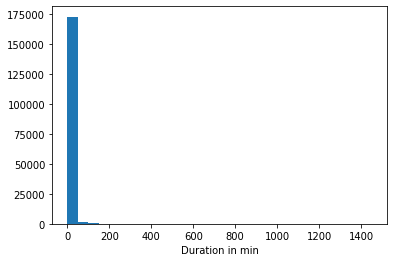

In [24]:
binsize = 50
bins = np.arange(0,bike_clean.duration_min.max()+binsize,binsize)
plt.hist(data=bike_clean, x="duration_min", bins= bins)
plt.xlabel("Duration in min")

The above distribution shows that most of ride are less than 200 min, let try with log scale and see what we can get

Text(0.5, 0, 'Duration in min')

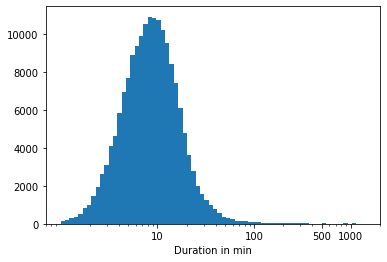

In [25]:
binsize = 0.045
bins = 10**np.arange(0,np.log10(bike_clean.duration_min.max())+binsize,binsize)
plt.hist(data=bike_clean, x="duration_min", bins= bins)
plt.xscale("log")
plt.xticks([10,100,500,1000],[10,100,500,1000])
plt.xlabel("Duration in min")

The duration_min looks normal on log scale but still slightly skewed to the right

In [26]:
bike_clean.duration_min.mean()

11.733379060161264

In [27]:
hours_outliers= bike_clean["duration_min"]<120
bike_clean = bike_clean.loc[hours_outliers,:]

Now since log transform of duration_min is more normal under log transformation let create a log transformation columns for the duration in min columns

In [28]:
bike_clean["log_duration_min"]= bike_clean.duration_min.apply(np.log10)

## How distributed is the age?


Next let check for the disturbution of member age

Text(0.5, 0, 'Member age')

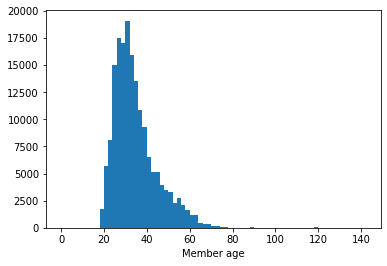

In [29]:
binsize= 2
bins = np.arange(0,max(bike_clean.member_age)+binsize,binsize)
plt.hist(data=bike_clean, x="member_age", bins= bins)
plt.xlabel("Member age")

Ths histogram above shows that people with age 20-40 are this one using this bike service this most, on the other hands having head greater than 60 years riding bike could cause biaseness for out analysis. Let make further finding with a boxplot

<AxesSubplot:xlabel='member_age'>

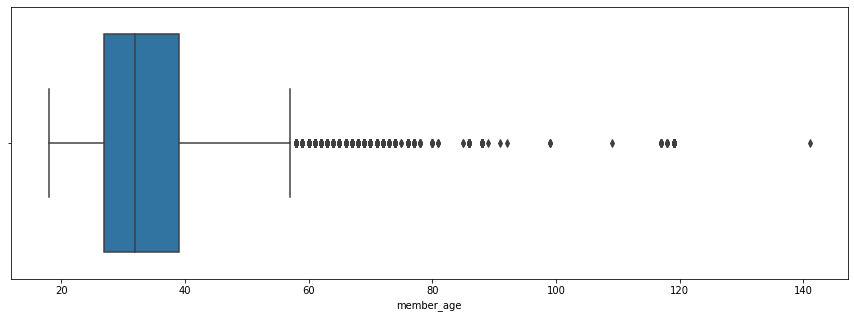

In [30]:
plt.figure(figsize=[15,5])
sb.boxplot(x= bike_clean["member_age"])

Now we can see that amlost all our member are under 60 years of age, this shows that the age above this is an outliers and which could be as a result of errors while filling registration form. Next let filter this outliers

In [31]:
bike_clean= bike_clean[bike_clean["member_age"]<60]

## which day of the week and hours has highest number of bike rent?

Let move on arranging our start_weekday and end_weekday

In [32]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri","Sat", "Sun"]
days_class= pd.api.types.CategoricalDtype(categories=days, ordered=True)
bike_clean["start_weekday"]= bike_clean["start_weekday"].astype(days_class)
bike_clean["end_weekday"]=bike_clean["end_weekday"].astype(days_class)

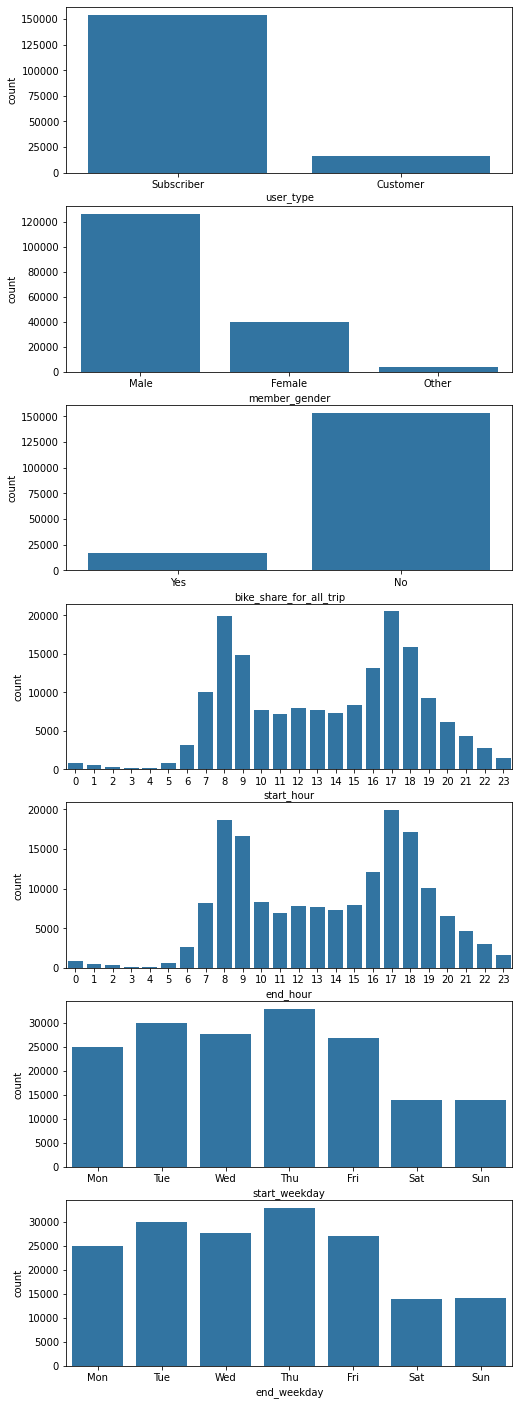

In [33]:
category_cols= ["user_type","member_gender","bike_share_for_all_trip","start_hour","end_hour","start_weekday","end_weekday"]
fig,ax =plt.subplots(nrows=7, figsize=[8,25])
base_color = sb.color_palette()[0]
for index in range(len(category_cols)):
    col = category_cols[index] 
    sb.countplot(data=bike_clean,x=col, ax=ax[index], color=base_color)
    ax[index].set_xlabel("{}".format(col))

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I performed a extraction on the giving duration in sec by converting to min and the distribtion that almost all the riding time is less than 120 min but there seems to be outliers to the right. After ploting on log scale the distribution appears more normal but still slightly skewed to the right, furthermore for to avoid biaseness duration more than 120 min  were removed

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> To make the analysis simple and be effective to communicate, member_age where extracted using the member_birth_year and also from start_time and end_time we extracted hour and weekday so that we can discover and find pattern between the effect of each day and duration in hours

## Bivariate Exploration

### How does age affect duration of rider?
> First let view the scatter plot betweeen  duration in hour and member age.
For overplotting let use a sample of 500

<AxesSubplot:xlabel='member_age', ylabel='duration_min'>

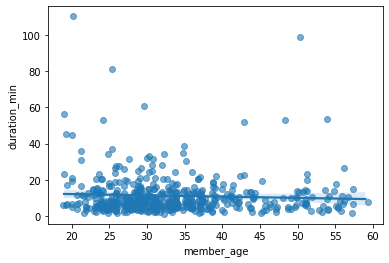

In [34]:
sample = np.random.choice(bike_clean.shape[0], 500)
bike_sample= bike_clean.iloc[sample,:]
sb.regplot(data=bike_sample, x="member_age", y="duration_min", scatter_kws={"alpha":0.6}, x_jitter=0.4)

<AxesSubplot:>

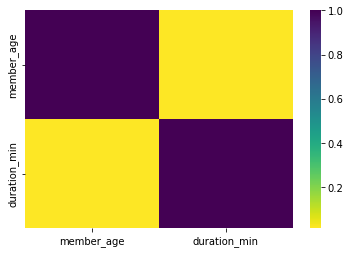

In [35]:
sb.heatmap(bike_clean[["member_age","duration_min"]].corr(), cmap="viridis_r")

This appears that there is not correlation between the duration that a particular member used that their age

Let proceed to check if weekday as effect on the time a particular member will used

# Average duration trip by weekday and hours

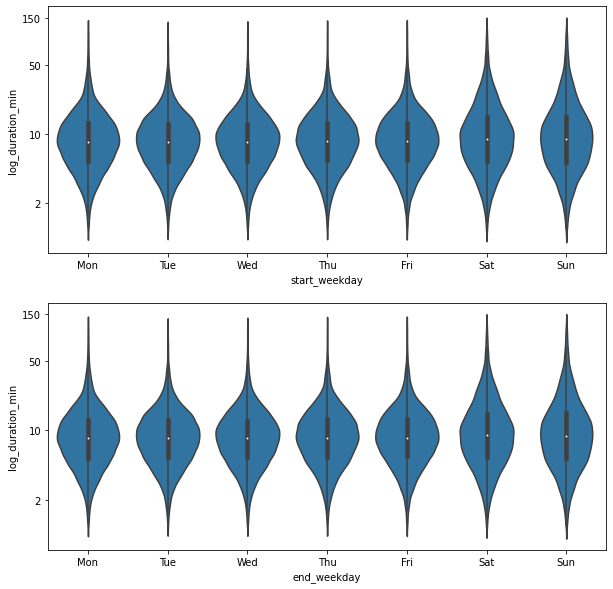

In [36]:
weekday = ["start_weekday", "end_weekday"]
base_color= sb.color_palette()[0]
fig,ax = plt.subplots(nrows=2, figsize =[10,10])
for i in  range(len(weekday)):
    week = weekday[i]
    sb.violinplot(data=bike_clean, x=week, y="log_duration_min", ax=ax[i], color=base_color)
    log_ticks = [2,10,50,150]
    ax[i].set_yticks(np.log10(log_ticks))
    ax[i].set_yticklabels(log_ticks);

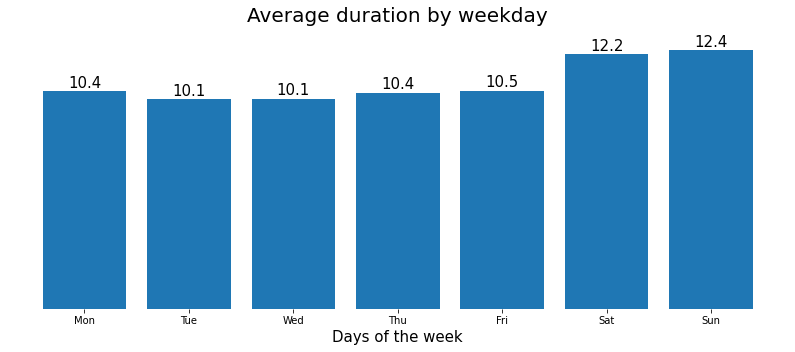

In [37]:
duration_weekday = bike_clean.groupby("start_weekday")["duration_min"].mean()
plt.figure(figsize=[14,5])
ax = plt.bar(x=duration_weekday.index, height= duration_weekday)
plt.grid(axis="y")
plt.title("Average duration by weekday", fontdict={"size":20}, pad=15)
plt.gca().set(frame_on=False)
plt.yticks([])
plt.xlabel("Days of the week", fontdict={"size":15})
for bar in ax.patches:
    plt.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

# Percentage of ride by weekday and hour

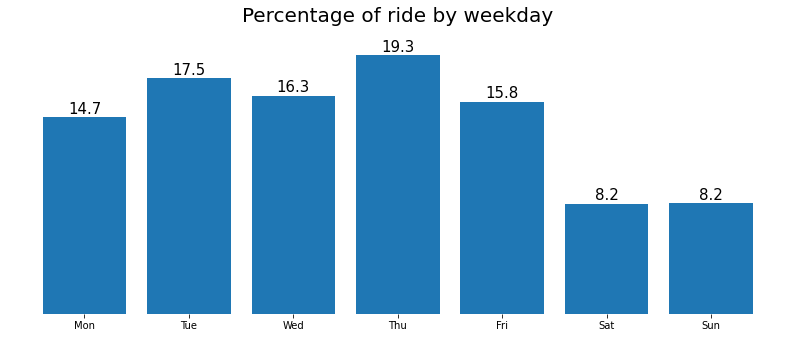

In [38]:
weekday_ride_per = (bike_clean.groupby("start_weekday")["bike_id"].size()/len(bike_clean))*100
plt.figure(figsize=[14,5])
ax = plt.bar(x=weekday_ride_per.index, height=weekday_ride_per)
plt.gca().set(frame_on=False)
plt.yticks([])
plt.title("Percentage of ride by weekday", fontdict={"size":20}, pad=20)
for bar in ax.patches:
    plt.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

Text(0, 0.5, 'Percentage(%)')

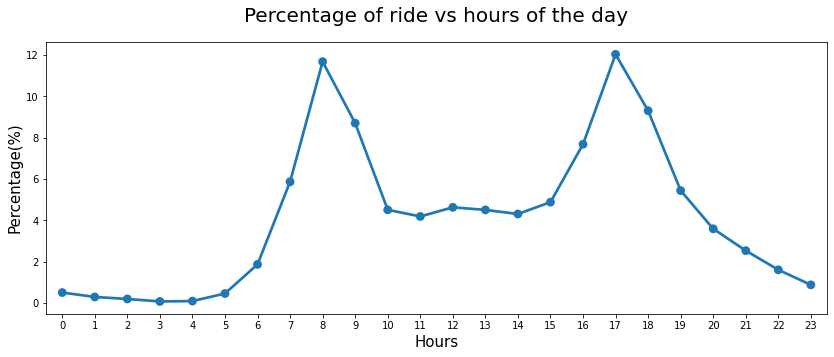

In [39]:
hour_ride_per = (bike_clean.groupby("start_hour")["bike_id"].size()/len(bike_clean))*100
plt.figure(figsize=[14,5])
ax= sb.pointplot(x=hour_ride_per.index, y=hour_ride_per)
plt.title("Percentage of ride vs hours of the day", fontdict={"size":20}, pad=20)
plt.xlabel("Hours",fontdict={"size":15})
plt.ylabel("Percentage(%)",fontdict={"size":15})

# Percentage by gender and Their average ride

Text(0.5, 1.0, 'Average duration by Gender')

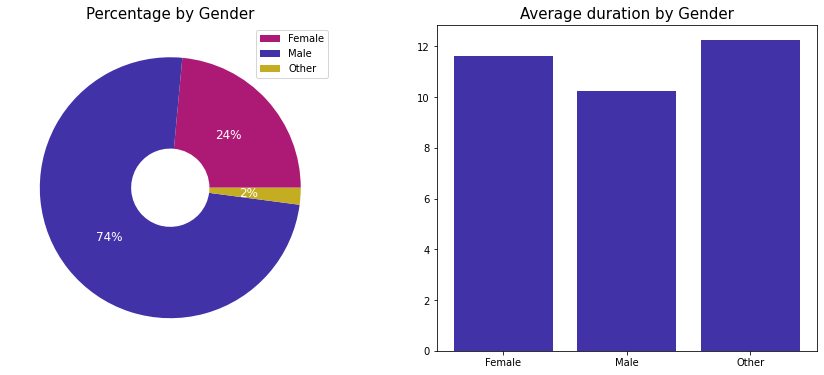

In [40]:
per_by_gender = (bike_clean.groupby("member_gender").size()/len(bike_clean))*100
average_duration= bike_clean.groupby("member_gender")["duration_min"].mean()
fig, ax= plt.subplots(ncols= 2, figsize=[15,6])
color = ["#ad1a75","#4232a8","#c4ac23"]
plt.subplot(1,2,1)
ax[0]=plt.pie(per_by_gender, labels=per_by_gender.index, colors=color, autopct="%.0f%%", wedgeprops={"width":0.7}, textprops={"color":"w", "size":12})
plt.title("Percentage by Gender", fontdict={"size":15})
plt.legend(loc= 1)
plt.subplot(1,2,2)
ax[1]=plt.bar(x=average_duration.index, height=average_duration, color= color[1])
plt.title("Average duration by Gender", fontdict={"size":15})

it appears that there seem to no  actual trends on the duration in which which ride is affected by week days

## Percentage to user type	 and their average ride duration

Text(0.5, 1.0, 'Average duration by user type')

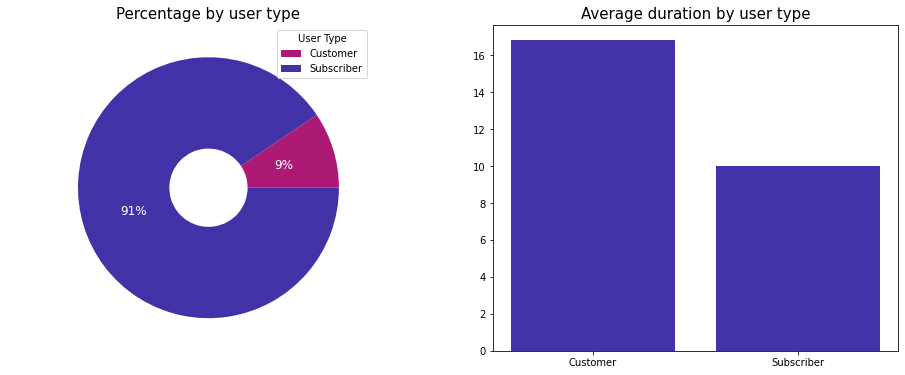

In [41]:
per_by_user_type = (bike_clean.groupby("user_type").size()/len(bike_clean))*100
average_duration= bike_clean.groupby("user_type")["duration_min"].mean()
fig, ax= plt.subplots(ncols= 2, figsize=[16,6])
color = ["#ad1a75","#4232a8","#c4ac23"]
plt.subplot(1,2,1)
ax[0]=plt.pie(per_by_user_type, labels=per_by_user_type.index, colors=color, autopct="%.0f%%", wedgeprops={"width":0.7}, textprops={"color":"w", "size":12})
plt.title("Percentage by user type", fontdict={"size":15})
plt.legend(title="User Type")
plt.subplot(1,2,2)
ax[1]=plt.bar(x=average_duration.index, height=average_duration, color= color[1])
plt.title("Average duration by user type", fontdict={"size":15})

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>Surprisingly age has no effect of the duration in which a member ride from one station to another as expected that there should be a negative linear relationship when age exceed 40. 

> There seems to be an intresting relationship between duration and categorial variables. For the weekday,during weekend
the number of people riding bike seems to reduce with teh average duration also and as seen 7am-8am and 4pm-5pm seems to be the time member are rising bike this could be as a result that people used bike to get to work while rushing in the morning and return back home after done at work

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> As expected average time spend by male as less than female as male are knowing as better rider and more energetic than female

## Multivariate Exploration

### what is the average duration type by each user type ?

Text(0.5, 0, 'Day of the week')

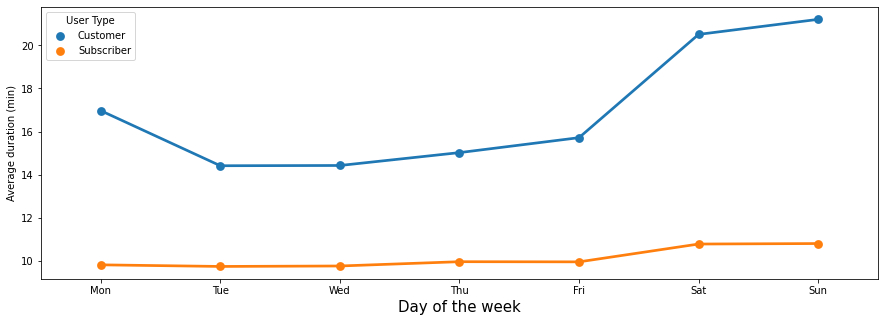

In [42]:
avg_week_user_type= bike_clean.groupby(["user_type", "start_weekday"])["duration_min"].mean().reset_index()
plt.figure(figsize=[15,5])
sb.pointplot(data=avg_week_user_type, x="start_weekday", y="duration_min", hue="user_type")
plt.legend(title= "User Type")
plt.ylabel("Average duration (min)")
plt.xlabel("Day of the week", fontdict={"size":15})

<AxesSubplot:xlabel='start_hour', ylabel='duration_min'>

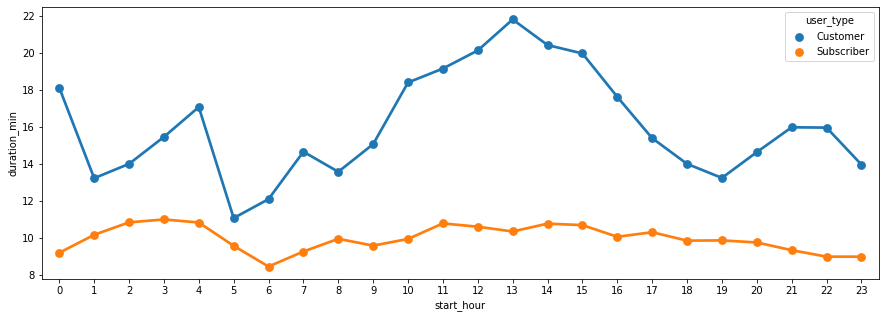

In [43]:
avg_week_user_type= bike_clean.groupby(["user_type", "start_hour"])["duration_min"].mean().reset_index()
plt.figure(figsize=[15,5])
sb.pointplot(data=avg_week_user_type, x="start_hour", y="duration_min", hue="user_type")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the Two chat in the multivariate plot this is seen that the suscriber are the one using this bike system most and they used this moostly to transit to and fro from work and the will be solemnly not to be held off by traffic since bike are easy to transit in traffic than cars 

### Were there any interesting or surprising interactions between features?

> During the weekend much of the transaction are based on recreaional actively and this led to increase in average time spend durinf this rides

## Conclusions
>After all data wrangling in extraction of weekday and duration in min i discovered that we have more of male usig this biking system and from user type there are more susbriber than customer.Futhermore our suscriber used the bike basically to transit to work in morning and to get back homr after work
